# Setup
Setup path to include our files. import them. use `autoreload` to get changes in as they are made


In [115]:
import os
import sys
import cv2
from matplotlib import pyplot as plt

# load our code
sys.path.insert(0, os.path.abspath('../'))
from tracker import set_tracker, TrackedFrame, Box
# specific to jupyter notebook
from jupyter_help import cvplt, cvplt_sub

# load any changes as we make them
%load_ext autoreload
%autoreload 2

# Load
load an interesting frame from video. fast forward some and load a new frame with the eye positioned differently



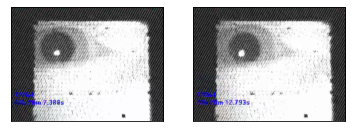

In [106]:
vid_fname = "../input/run1.mov" # path relative to this document
frame_number = 200
frame_jumpto = 500

# read in
vs = cv2.VideoCapture(vid_fname)
vs.set(1, frame_number)
frame = vs.read()[1]
vs.set(1, frame_jumpto)
frame_jump = vs.read()[1]

# show in notebook

cvplt_sub([frame, frame_jump],1 ,2)


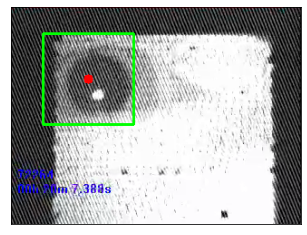

In [95]:
# intiail bounding box
bbox = (35, 30, 100, 100)
init_box = Box(bbox)
frame_box = frame.copy() # normally passed by reference. dont want to touch orig. 'frame'
init_box.draw_box(frame_box)

## kcf
defautl tacker

box: (35.0, 30.0, 100.0, 100.0)


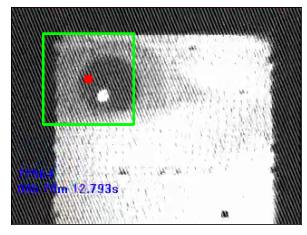

In [108]:
tracker = set_tracker("kcf")
tracker.init(frame, bbox)

(success, box) = tracker.update(frame_jump)
kcf_box = Box(box)
print(f'box: {box}')

# deal with tracking
kcf = TrackedFrame(frame_jump, frame_jumpto)
kcf.set_box(kcf_box)
kcf.draw_tracking({})
cvplt(tframe.frame)

## Boosting
alternative

box: (46.0, 30.0, 100.0, 100.0)


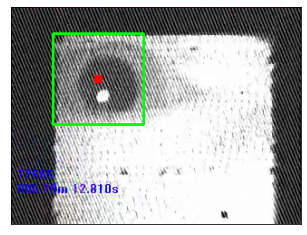

In [109]:
tracker = set_tracker("boosting")
tracker.init(frame, bbox)
next_frame = vs.read()[1]
(success, box) = tracker.update(next_frame)
boost_box = Box(box)
print(f'box: {box}')
boost = TrackedFrame(next_frame, frame_number + 1)
boost.set_box(boost_box)
boost.draw_tracking({})
cvplt(boost.frame)

# Results
boost does better than kcf?

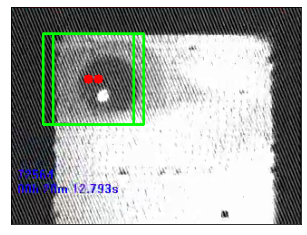

In [114]:
combined = frame_jump.copy()
kcf_box.draw_box(combined)
boost_box.draw_box(combined)
#cvplt_sub([kcf.frame,boost.frame, combined], 1, 3)
cvplt(combined)